# Agent Performance Insights Project

This project evaluates chat support agents' performance by tracking key metrics such as weekly ratings (considering leave), working days, queries handled, feedback received, response and resolution times, and contribution hours. It identifies top-performing and underperforming agents, analyzes feedback patterns, and calculates active hour percentages to optimize productivity and improve customer satisfaction.

In [37]:
# importing necessary libraries to perform data anlysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

log_df=pd.read_csv('AgentLogingReport.csv')
per_df=pd.read_csv('AgentPerformance.csv')

In [36]:
log_df[column].unique()  # this dataframe has agents login details for month of July 2022

In [3]:
per_df.head()  # this dataframe contains agents performance details for same month

,SL No,Date,Agent Name,Total Chats,Average Response Time,Average Resolution Time,Average Rating,Total Feedback
0,1,7/30/2022,Prerna Singh,11,0:00:38,0:04:20,4.11,9
1,2,7/30/2022,Nandani Gupta,11,0:01:15,0:28:25,3.14,7
2,3,7/30/2022,Ameya Jain,14,0:00:30,0:11:36,4.55,11
3,4,7/30/2022,Mahesh Sarade,14,0:01:04,0:15:46,4.71,7
4,5,7/30/2022,Swati,14,0:01:11,0:16:33,3.67,6


In [31]:
log_df['Agent']=Tarun

NameError: name 'Tarun' is not defined

In [4]:
log_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SL No        1000 non-null   int64 
 1   Agent        1000 non-null   object
 2   Date         1000 non-null   object
 3   Login Time   1000 non-null   object
 4   Logout Time  1000 non-null   object
 5   Duration     1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [5]:
per_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SL No                    2160 non-null   int64  
 1   Date                     2160 non-null   object 
 2   Agent Name               2160 non-null   object 
 3   Total Chats              2160 non-null   int64  
 4   Average Response Time    2160 non-null   object 
 5   Average Resolution Time  2160 non-null   object 
 6   Average Rating           2160 non-null   float64
 7   Total Feedback           2160 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 135.1+ KB


In [6]:
# Droping the not required columns from the dataframes to get cleaned data for analysis

log_df.drop(columns=['SL No'],inplace=True)

In [7]:
per_df.drop(columns=['SL No'],inplace=True)

In [8]:
# List of all agents name

agent_names=log_df['Agent'].unique().tolist()
agent_names

['Shivananda Sonwane',
 'Khushboo Priya',
 'Nandani Gupta',
 'Hrisikesh Neogi',
 'Mukesh',
 'Sowmiya Sivakumar',
 'Manjunatha A',
 'Harikrishnan Shaji',
 'Suraj S Bilgi',
 'Shivan K',
 'Anurag Tiwari',
 'Ishawant Kumar',
 'Shubham Sharma',
 'Prerna Singh',
 'Nishtha Jain',
 'Prateek _iot',
 'Mithun S',
 'Madhulika G',
 'Boktiar Ahmed Bappy',
 'Jawala Prakash',
 'Dibyanshu',
 'Deepranjan Gupta',
 'Jaydeep Dixit',
 'Ayushi Mishra',
 'Mahesh Sarade',
 'Muskan Garg',
 'Chaitra K Hiremath',
 'Shiva Srivastava',
 'Aditya_iot',
 'Prabir Kumar Satapathy',
 'Sanjeev Kumar',
 'Zeeshan',
 'Rishav Dash',
 'Wasim',
 'Bharath',
 'Ameya Jain',
 'Saikumarreddy N',
 'Aravind',
 'Amersh',
 'Sudhanshu Kumar',
 'Ankitjha',
 'Maitry',
 'Aditya Shinde',
 'Hyder Abbas',
 'Swati',
 'Saurabh Shukla',
 'Nitin M',
 'Ineuron Intelligence',
 'Tarun']

In [9]:
# Converting Date column to datetime datatype in order to perform calculations

log_df['Date']=pd.to_datetime(log_df['Date'], dayfirst=True)

In [10]:
log_df['Date']

0     2022-07-30
1     2022-07-30
2     2022-07-30
3     2022-07-30
4     2022-07-30
         ...    
995   2022-07-20
996   2022-07-20
997   2022-07-20
998   2022-07-20
999   2022-07-01
Name: Date, Length: 1000, dtype: datetime64[ns]

In [11]:
log_df['Login Time']=pd.to_datetime(log_df['Login Time'], format='%H:%M:%S').dt.time
log_df['Logout Time']=pd.to_datetime(log_df['Logout Time'], format='%H:%M:%S').dt.time

In [12]:
log_df

,Agent,Date,Login Time,Logout Time,Duration
0,Shivananda Sonwane,2022-07-30,15:35:29,17:39:39,02:04:10
1,Khushboo Priya,2022-07-30,15:06:59,15:07:16,00:00:17
2,Nandani Gupta,2022-07-30,15:04:24,17:31:07,02:26:42
3,Hrisikesh Neogi,2022-07-30,14:34:29,15:19:35,00:45:06
4,Mukesh,2022-07-30,14:03:15,15:11:52,01:08:36
...,...,...,...,...,...
995,Manjunatha A,2022-07-20,09:03:51,15:02:28,05:58:37
996,Bharath,2022-07-20,09:00:49,15:01:32,06:00:43
997,Khushboo Priya,2022-07-20,08:59:20,14:26:55,05:27:34
998,Nishtha Jain,2022-07-20,08:43:55,14:00:33,05:16:38


In [13]:
per_df['Average Response Time']=pd.to_datetime(per_df['Average Response Time'], format='%H:%M:%S').dt.time
per_df['Average Resolution Time']=pd.to_datetime(per_df['Average Resolution Time'], format='%H:%M:%S').dt.time

In [14]:
per_df

,Date,Agent Name,Total Chats,Average Response Time,Average Resolution Time,Average Rating,Total Feedback
0,7/30/2022,Prerna Singh,11,00:00:38,00:04:20,4.11,9
1,7/30/2022,Nandani Gupta,11,00:01:15,00:28:25,3.14,7
2,7/30/2022,Ameya Jain,14,00:00:30,00:11:36,4.55,11
3,7/30/2022,Mahesh Sarade,14,00:01:04,00:15:46,4.71,7
4,7/30/2022,Swati,14,00:01:11,00:16:33,3.67,6
...,...,...,...,...,...,...,...
2155,7/1/2022,Sowmiya Sivakumar,0,00:00:00,00:00:00,0.00,0
2156,7/1/2022,Nitin M,0,00:00:00,00:00:00,0.00,0
2157,7/1/2022,Vivek,0,00:00:00,00:00:00,0.00,0
2158,7/1/2022,Ayushi Mishra,0,00:00:00,00:00:00,0.00,0


### Finding out Agent's average rating on weekly basis keeping this in a mind that they take two days of leave in a week.

In [15]:
from datetime import timedelta
per_df['Date'] = pd.to_datetime(per_df['Date'])   # converting to datetime

per_df['Year-Week'] = per_df['Date'].dt.strftime('%U') #'Year-Week' grouping

# Count the number of working days per agent per week (excluding weekends)
per_df['Weekday'] = per_df['Date'].dt.weekday  # 0=Monday, 6=Sunday

# Filter ratings from the 5 working days
working_days_df = per_df[per_df['Weekday'] < 5]

# Group by Agent and Year-Week, then calculate the average rating
weekly_ratings = working_days_df.groupby(['Agent Name', 'Year-Week'])['Average Rating'].mean().reset_index()

# Rename the columns for better clarity
weekly_ratings.columns = ['Agent Name', 'Year-Week', 'Average Weekly Rating']
weekly_ratings.tail()

,Agent Name,Year-Week,Average Weekly Rating
345,Zeeshan,26,0.000
346,Zeeshan,27,1.830
347,Zeeshan,28,3.300
348,Zeeshan,29,3.482
349,Zeeshan,30,3.312


### Total working days for each agent.

In [4]:
Total_working_days=log_df.groupby(['Agent'])['Date'].nunique().reset_index()
Total_working_days=Total_working_days.head(30)

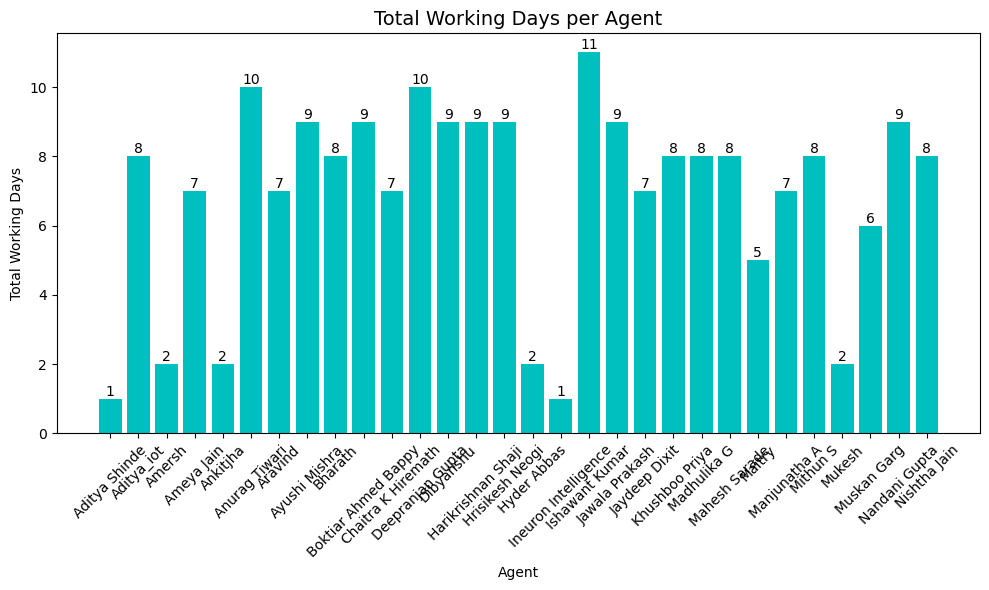

In [9]:
plt.figure(figsize=(10, 6))

bars = plt.bar(Total_working_days['Agent'], Total_working_days['Date'], color='c')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10)

plt.title('Total Working Days per Agent', fontsize=14)
plt.xlabel('Agent', fontsize=10)
plt.ylabel('Total Working Days', fontsize=10)
plt.xticks(rotation=45)


# Show the plot
plt.tight_layout()
plt.show()

### Total number of queries that agents have taken.

In [10]:
Total_query=per_df.groupby(['Agent Name'])['Total Chats'].sum().reset_index().sort_values(by='Total Chats',ascending=False)
filtered_agents=Total_query[Total_query['Total Chats']>=100] # filtered agents who have taken more than 100 chats
filtered_agents.head()

,Agent Name,Total Chats
21,Hrisikesh Neogi,578
39,Nandani Gupta,560
69,Zeeshan,542
32,Maitry,542
63,Swati,524


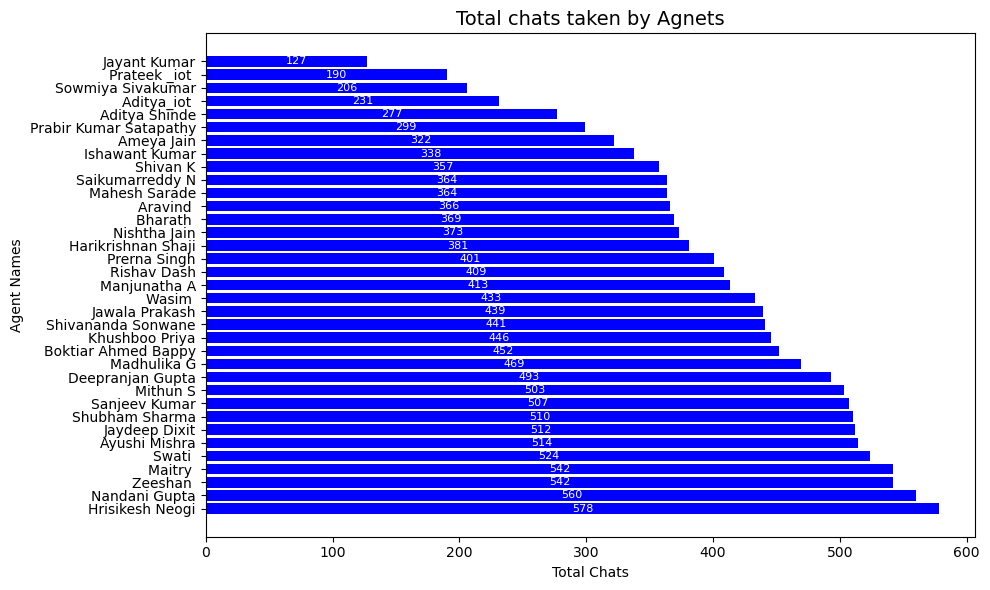

In [15]:
# Visual representation of the number of chats taken by each agent (for agents who have taken more than 100 chats)
agents = filtered_agents['Agent Name']
total_chats = np.array(filtered_agents.sort_values(by='Total Chats', ascending=False)['Total Chats'])
y = np.arange(len(agents))

plt.figure(figsize=(10, 6))
plt.barh(agents, total_chats, color='blue')
plt.title('Total chats taken by Agnets', fontsize=14)
plt.xlabel('Total Chats', fontsize=10)
plt.ylabel('Agent Names', fontsize=10)

for i in range(len(agents)):
    plt.text(total_chats[i] / 2,y[i], str(total_chats[i]), va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()

### Total number of Feedbacks recieved by each agents 

In [20]:
Total_Feedback=per_df.groupby(['Agent Name'])['Total Feedback'].sum().reset_index().sort_values(by='Total Feedback',ascending=False)
Total_Feedback.head(10)

,Agent Name,Total Feedback
21,Hrisikesh Neogi,367
35,Mithun S,364
32,Maitry,347
69,Zeeshan,335
13,Ayushi Mishra,329
17,Deepranjan Gupta,312
51,Sanjeev Kumar,311
15,Boktiar Ahmed Bappy,311
39,Nandani Gupta,308
27,Jaydeep Dixit,305


### Trying to find out Solid Performers based on their ratings

In [21]:
avg_rating_df=round(per_df.groupby('Agent Name')['Average Rating'].mean(),2).reset_index()
Rang_of_avg_rating=avg_rating_df[(avg_rating_df['Average Rating']>=3.5) & (avg_rating_df['Average Rating']<=4)][['Agent Name','Average Rating']]
Rang_of_avg_rating

,Agent Name,Average Rating
15,Boktiar Ahmed Bappy,3.57
24,Ishawant Kumar,3.54
28,Khushboo Priya,3.70
29,Madhulika G,3.50
34,Manjunatha A,3.59


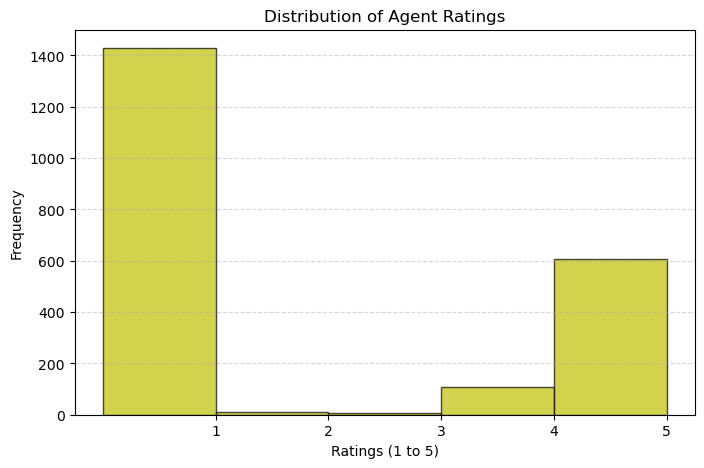

In [18]:
import matplotlib.pyplot as plt

ratings = np.array(per_df['Average Rating']) 

# Plot
plt.figure(figsize=(8, 5))
plt.hist(ratings, bins=5, color='y', edgecolor='black', alpha=0.7)

# Labels and Title
plt.xlabel("Ratings (1 to 5)")
plt.ylabel("Frequency")
plt.title("Distribution of Agent Ratings")
plt.xticks([1, 2, 3, 4, 5])  # Ensure x-axis only has integer ratings
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


### Conclusions about the distribution of agent ratings:

##### 1. The majority of agents received low ratings, with a significant peak at a rating of 1. This indicates that many agents are underperforming according to the feedback.

##### 2. Higher ratings, especially 4 and 5, are less frequent. However, there is a noticeable increase at these higher values, which might suggest a small group of agents who perform exceptionally well.

### Identifying Agents Requiring Service Delivery Improvement.

In [22]:
avg_rating_df[avg_rating_df['Average Rating']<3.5]

,Agent Name,Average Rating
0,Abhishek,0.00
1,Aditya,0.00
2,Aditya Shinde,1.80
3,Aditya_iot,2.35
4,Amersh,0.00
...,...,...
65,Uday Mishra,0.00
66,Vasanth P,0.00
67,Vivek,0.50
68,Wasim,2.40


### Recognizing High-Performing Agents with Exceptional Service Delivery

In [23]:
avg_rating_df[avg_rating_df['Average Rating']>4.5]  #unfortunately there no high performing agents 

,Agent Name,Average Rating


### Determining the Number of Agents with an Average Feedback Rating Above 4.5

In [24]:
filtered_agents=per_df[per_df['Average Rating']>4.5]
result = (filtered_agents.groupby('Agent Name').agg({'Average Rating': 'first', 'Total Feedback': 'sum'}).reset_index())

result.head()

,Agent Name,Average Rating,Total Feedback
0,Aditya Shinde,4.53,73
1,Aditya_iot,4.60,43
2,Ameya Jain,4.55,150
3,Anirudh,5.00,2
4,Ankitjha,5.00,1


### Calculating the Average Weekly Response Time for Each Agent

In [25]:

from datetime import timedelta,time
per_df['Date'] = pd.to_datetime(per_df['Date'])

# Convert 'Average Response Time' from datetime.time to timedelta if necessary
def time_to_timedelta(t):
    if isinstance(t, pd.Timedelta):  # Already timedelta
        return t
    elif isinstance(t, time):  # Convert datetime.time to timedelta
        return timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)
    else:
        raise ValueError(f"Invalid type for 'Average Response Time': {type(t)}")

# Apply the conversion function to the 'Average Response Time' column
per_df['Average Response Time'] = per_df['Average Response Time'].apply(time_to_timedelta)

# Extract 'Year-Week' for grouping
per_df['Year-Week'] = per_df['Date'].dt.strftime('%Y-%U')

# Calculate average weekly response time per agent
weekly_response_time = (
    per_df.groupby(['Agent Name', 'Year-Week'])['Average Response Time']
    .mean()
    .reset_index()
)

def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    return f"{hours:02}:{minutes:02}:{seconds:02}"  # Format as HH:MM:SS

# Apply the formatting function
weekly_response_time['Average Response Time'] = weekly_response_time['Average Response Time'].apply(format_timedelta)
weekly_response_time.tail()

,Agent Name,Year-Week,Average Response Time
345,Zeeshan,2022-26,00:00:00
346,Zeeshan,2022-27,00:00:23
347,Zeeshan,2022-28,00:02:03
348,Zeeshan,2022-29,00:00:51
349,Zeeshan,2022-30,00:01:06


### Calculating the Average Weekly resolution Time for Each Agent

In [26]:

from datetime import timedelta,time
per_df['Date'] = pd.to_datetime(per_df['Date'])

# Convert 'Average Response Time' from datetime.time to timedelta if necessary
def time_to_timedelta(t):
    if isinstance(t, pd.Timedelta):  # Already timedelta
        return t
    elif isinstance(t, time):  # Convert datetime.time to timedelta
        return timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)
    else:
        raise ValueError(f"Invalid type for 'Average Response Time': {type(t)}")

# Apply the conversion function to the 'Average Response Time' column
per_df['Average Resolution Time'] = per_df['Average Resolution Time'].apply(time_to_timedelta)

# Extract 'Year-Week' for grouping
per_df['Year-Week'] = per_df['Date'].dt.strftime('%Y-%U')

# Calculate average weekly response time per agent
weekly_response_time = (
    per_df.groupby(['Agent Name', 'Year-Week'])['Average Resolution Time']
    .mean()
    .reset_index()
)

def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    return f"{hours:02}:{minutes:02}:{seconds:02}"  # Format as HH:MM:SS

# Apply the formatting function
weekly_response_time['Average Resolution Time'] = weekly_response_time['Average Resolution Time'].apply(format_timedelta)
weekly_response_time.tail()

,Agent Name,Year-Week,Average Resolution Time
345,Zeeshan,2022-26,00:00:00
346,Zeeshan,2022-27,00:05:23
347,Zeeshan,2022-28,00:16:24
348,Zeeshan,2022-29,00:10:22
349,Zeeshan,2022-30,00:13:55


### Calculating the Feedback Response Rate for Each Agent's Chats

In [20]:

total_feedback_per_agent = per_df.groupby('Agent Name').agg({'Total Chats': 'sum','Total Feedback': 'sum'}).reset_index()

# Calculate the percentage of feedback for each agent
total_feedback_per_agent['Feedback Percentage'] = round((
    (total_feedback_per_agent['Total Feedback'] / total_feedback_per_agent['Total Chats']) * 100),2)
total_feedback_per_agent=total_feedback_per_agent[(total_feedback_per_agent['Feedback Percentage'].notna()) & (total_feedback_per_agent['Feedback Percentage']!=0)]
filt_feeds=total_feedback_per_agent[total_feedback_per_agent['Total Chats']>=100].sort_values(by='Total Chats')


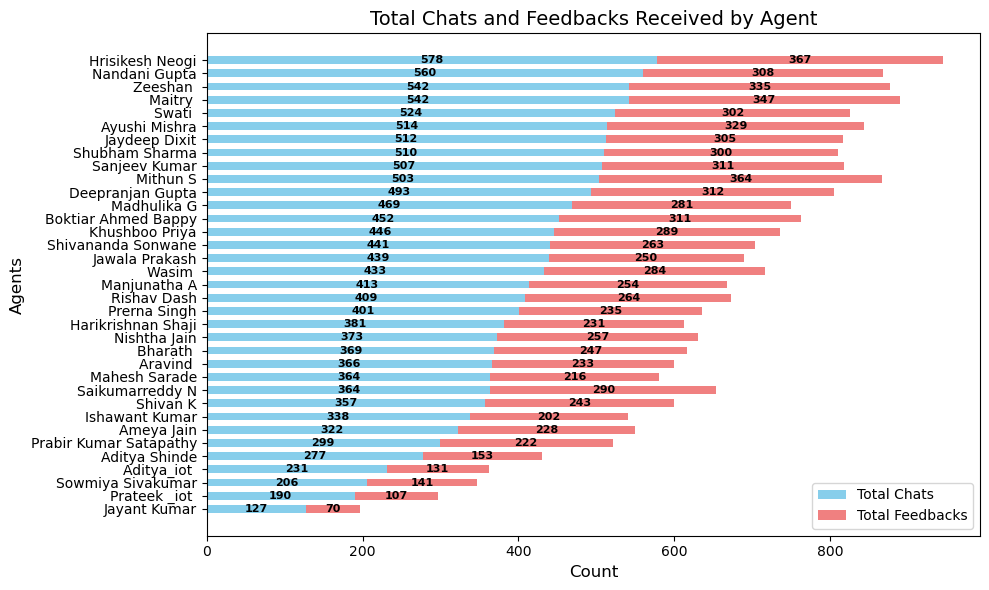

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Convert data to arrays for easier handling
agents = filt_feeds['Agent Name']
total_chats = np.array(filt_feeds['Total Chats'])
total_feedbacks = np.array(filt_feeds['Total Feedback'])

# Y-axis positions for each agent
y = np.arange(len(agents))  # For horizontal bar chart

# Bar height
bar_height = 0.6

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the stacked bars (horizontal)
plt.barh(y, total_chats, color='skyblue', height=bar_height, label='Total Chats')
plt.barh(y, total_feedbacks, color='lightcoral', height=bar_height, left=total_chats, label='Total Feedbacks')

# Add labels and title
plt.ylabel('Agents', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Total Chats and Feedbacks Received by Agent', fontsize=14)
plt.yticks(y, agents)  # Agent names on the y-axis
plt.legend()

# Add value labels to the bars
for i in range(len(agents)):
    # Total Chats label
    chat_x_pos = total_chats[i] / 2  # Centered inside the blue bar
    feedback_x_pos = total_chats[i] + (total_feedbacks[i] / 2)  # Centered inside the red bar

    # Ensure labels fit within the bars
    chat_color = 'black' if total_chats[i] > 20 else 'white'  # Change color for better contrast
    feedback_color = 'black' if total_feedbacks[i] > 10 else 'white'  

    plt.text(chat_x_pos, y[i], str(total_chats[i]), va='center', ha='center', color=chat_color, fontsize=8, fontweight='bold')
    plt.text(feedback_x_pos, y[i], str(total_feedbacks[i]), va='center', ha='center', color=feedback_color, fontsize=8, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


### Total Weekly Contribution Hours for Each Agent

In [29]:

log_df['Duration'] = pd.to_timedelta(log_df['Duration'])

log_df['Year-Week'] = log_df['Date'].dt.strftime('%Y-%U')  #Year-WeekNumber format

weekly_active_hours = log_df.groupby(['Agent', 'Year-Week'])['Duration'].sum().reset_index() #grouping by agents and weeks

weekly_active_hours['Total Contribution Hours'] = round(weekly_active_hours['Duration'].dt.total_seconds() / 3600,2)  # Convert 'Duration' to hours
weekly_active_hours[['Agent', 'Year-Week', 'Total Contribution Hours']]

,Agent,Year-Week,Total Contribution Hours
0,Aditya Shinde,2022-30,0.04
1,Aditya_iot,2022-29,6.10
2,Aditya_iot,2022-30,9.64
3,Amersh,2022-30,3.06
4,Ameya Jain,2022-29,17.23
...,...,...,...
84,Tarun,2022-26,514.14
85,Wasim,2022-29,19.63
86,Wasim,2022-30,28.55
87,Zeeshan,2022-29,18.34


### Total percentage of active hours for a month. 

In [30]:
log_df['Month'] = log_df['Date'].dt.to_period('M')

# Calculate total active hours per agent for the month
monthly_active_hours = log_df.groupby(['Agent', 'Month'])['Duration'].sum().reset_index()

# Set working days and hours per day (example: 22 working days, 8 hours/day)
WORKING_DAYS = 22
WORKING_HOURS_PER_DAY = 8

# Calculate total possible working hours for each agent
monthly_active_hours['Total Possible Hours'] = WORKING_DAYS * WORKING_HOURS_PER_DAY

# Convert 'Duration' to hours
monthly_active_hours['Total Active Hours'] = monthly_active_hours['Duration'].dt.total_seconds() / 3600

# Calculate percentage of active hours
monthly_active_hours['Percentage Active Hours'] = round(((monthly_active_hours['Total Active Hours'] / monthly_active_hours['Total Possible Hours']) * 100),2)
monthly_active_hours[['Agent', 'Month', 'Percentage Active Hours']].sort_values(by='Agent')


,Agent,Month,Percentage Active Hours
0,Aditya Shinde,2022-07,0.02
1,Aditya_iot,2022-07,8.94
2,Amersh,2022-07,1.74
3,Ameya Jain,2022-07,23.91
4,Ankitjha,2022-07,1.29
5,Anurag Tiwari,2022-07,1.58
6,Aravind,2022-07,13.81
7,Ayushi Mishra,2022-07,21.66
8,Bharath,2022-07,27.32
9,Boktiar Ahmed Bappy,2022-07,22.88


### THE END